This is the start of our project

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import seaborn as sns
from sklearn.metrics import precision_score, recall_score, confusion_matrix, matthews_corrcoef, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

 # Read the CSV file df = 
data = pd.read_csv("DDoSdata_sample_final.csv")

 # Explore the data (optional, but recommended for understanding) 
print(data.head()) 
print(data.info()) 
print(data.isnull().sum()) 
print(data.describe())
data.duplicated().sum()
data.dropna(inplace=True)

 # Sample 10% of the data (4% in this case) 
sample_data = data.sample(frac=0.1, random_state=42) 
 
# Save the sample to a CSV file sample_df.to_csv("DDoSdata_sampl_final.csv", index=False)

   Unnamed: 0  pkSeqID         stime flgs  flgs_number proto  proto_number  \
0     3560041  3560039  1.528099e+09    e            1   udp             3   
1     2720612  2720611  1.528099e+09    e            1   udp             3   
2     2334805  2334804  1.528096e+09  e s            2   tcp             1   
3     2961141  2961140  1.528099e+09    e            1   udp             3   
4     3003596  3003594  1.528099e+09    e            1   udp             3   

             saddr  sport          daddr  ...  AR_P_Proto_P_DstIP  \
0  192.168.100.150  22495  192.168.100.3  ...            0.677645   
1  192.168.100.150   9236  192.168.100.3  ...            0.467796   
2  192.168.100.147  10420  192.168.100.3  ...            0.508467   
3  192.168.100.148  60073  192.168.100.3  ...            0.801816   
4  192.168.100.147   8152  192.168.100.3  ...            0.994427   

   N_IN_Conn_P_DstIP  N_IN_Conn_P_SrcIP AR_P_Proto_P_Sport  \
0                100                 47           0.53

In [25]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop duplicates, if any
if duplicates > 0:
    data = data.drop_duplicates()
    print("Duplicates dropped!")
else:
    print("No duplicates found.")

Number of duplicate rows: 0
No duplicates found.


In [26]:
# Check for missing values after dropping rows with NaNs
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Confirm if there are no missing values left
if missing_values.sum() == 0:
    print("No missing values detected!")
else:
    print("Some missing values remain. Further action may be needed.")

Missing values in each column:
Unnamed: 0                          0
pkSeqID                             0
stime                               0
flgs                                0
flgs_number                         0
proto                               0
proto_number                        0
saddr                               0
sport                               0
daddr                               0
dport                               0
pkts                                0
bytes                               0
state                               0
state_number                        0
ltime                               0
seq                                 0
dur                                 0
mean                                0
stddev                              0
sum                                 0
min                                 0
max                                 0
spkts                               0
dpkts                               0
sbytes             

In [27]:
# Standardize column names: lowercase and replace spaces with underscores
data.columns = data.columns.str.lower().str.replace(' ', '_')

# Display the updated column names
print("Updated column names:")
print(data.columns)

Updated column names:
Index(['unnamed:_0', 'pkseqid', 'stime', 'flgs', 'flgs_number', 'proto',
       'proto_number', 'saddr', 'sport', 'daddr', 'dport', 'pkts', 'bytes',
       'state', 'state_number', 'ltime', 'seq', 'dur', 'mean', 'stddev', 'sum',
       'min', 'max', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'srate',
       'drate', 'tnbpsrcip', 'tnbpdstip', 'tnp_psrcip', 'tnp_pdstip',
       'tnp_perproto', 'tnp_per_dport', 'ar_p_proto_p_srcip',
       'ar_p_proto_p_dstip', 'n_in_conn_p_dstip', 'n_in_conn_p_srcip',
       'ar_p_proto_p_sport', 'ar_p_proto_p_dport',
       'pkts_p_state_p_protocol_p_destip', 'pkts_p_state_p_protocol_p_srcip',
       'attack', 'category', 'subcategory'],
      dtype='object')


In [28]:
# Check data types of each column
print("Data types of columns:")
print(data.dtypes)

# Identify categorical columns (if any)
categorical_columns = data.select_dtypes(include=['object']).columns
print("\nCategorical columns:")
print(categorical_columns)

# Identify numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical columns:")
print(numerical_columns)

Data types of columns:
unnamed:_0                            int64
pkseqid                               int64
stime                               float64
flgs                                 object
flgs_number                           int64
proto                                object
proto_number                          int64
saddr                                object
sport                                 int64
daddr                                object
dport                                 int64
pkts                                  int64
bytes                                 int64
state                                object
state_number                          int64
ltime                               float64
seq                                   int64
dur                                 float64
mean                                float64
stddev                              float64
sum                                 float64
min                                 float64
max      

In [29]:
# Drop the unnecessary 'unnamed:_0' column, if present
if 'unnamed:_0' in data.columns:
    data.drop('unnamed:_0', axis=1, inplace=True)
    print("'unnamed:_0' column dropped!")

# Confirm the remaining columns
print("Columns after dropping 'unnamed:_0':")
print(data.columns)

'unnamed:_0' column dropped!
Columns after dropping 'unnamed:_0':
Index(['pkseqid', 'stime', 'flgs', 'flgs_number', 'proto', 'proto_number',
       'saddr', 'sport', 'daddr', 'dport', 'pkts', 'bytes', 'state',
       'state_number', 'ltime', 'seq', 'dur', 'mean', 'stddev', 'sum', 'min',
       'max', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'srate', 'drate',
       'tnbpsrcip', 'tnbpdstip', 'tnp_psrcip', 'tnp_pdstip', 'tnp_perproto',
       'tnp_per_dport', 'ar_p_proto_p_srcip', 'ar_p_proto_p_dstip',
       'n_in_conn_p_dstip', 'n_in_conn_p_srcip', 'ar_p_proto_p_sport',
       'ar_p_proto_p_dport', 'pkts_p_state_p_protocol_p_destip',
       'pkts_p_state_p_protocol_p_srcip', 'attack', 'category', 'subcategory'],
      dtype='object')


In [30]:
# Drop high-cardinality or irrelevant columns if they exist
columns_to_drop = ['Unnamed: 0', 'pkSeqID', 'saddr', 'daddr']
data_reduced = data.drop(columns=[col for col in columns_to_drop if col in data.columns])

# Confirm the remaining columns
print("Remaining columns after dropping irrelevant features:")
print(data_reduced.columns)

Remaining columns after dropping irrelevant features:
Index(['pkseqid', 'stime', 'flgs', 'flgs_number', 'proto', 'proto_number',
       'sport', 'dport', 'pkts', 'bytes', 'state', 'state_number', 'ltime',
       'seq', 'dur', 'mean', 'stddev', 'sum', 'min', 'max', 'spkts', 'dpkts',
       'sbytes', 'dbytes', 'rate', 'srate', 'drate', 'tnbpsrcip', 'tnbpdstip',
       'tnp_psrcip', 'tnp_pdstip', 'tnp_perproto', 'tnp_per_dport',
       'ar_p_proto_p_srcip', 'ar_p_proto_p_dstip', 'n_in_conn_p_dstip',
       'n_in_conn_p_srcip', 'ar_p_proto_p_sport', 'ar_p_proto_p_dport',
       'pkts_p_state_p_protocol_p_destip', 'pkts_p_state_p_protocol_p_srcip',
       'attack', 'category', 'subcategory'],
      dtype='object')


Correlation with 'attack':
attack                              1.000000
ltime                               0.997296
stime                               0.997293
n_in_conn_p_dstip                   0.518719
n_in_conn_p_srcip                   0.037802
max                                 0.025337
mean                                0.022528
seq                                 0.021726
stddev                              0.015883
tnp_per_dport                       0.011759
min                                 0.011116
pkts_p_state_p_protocol_p_destip    0.010489
flgs_number                         0.010211
srate                               0.009141
state_number                        0.007495
sport                               0.000652
ar_p_proto_p_dport                 -0.003380
proto_number                       -0.007693
dport                              -0.010113
drate                              -0.020573
pkseqid                            -0.024168
pkts_p_state_p_protocol_p_sr

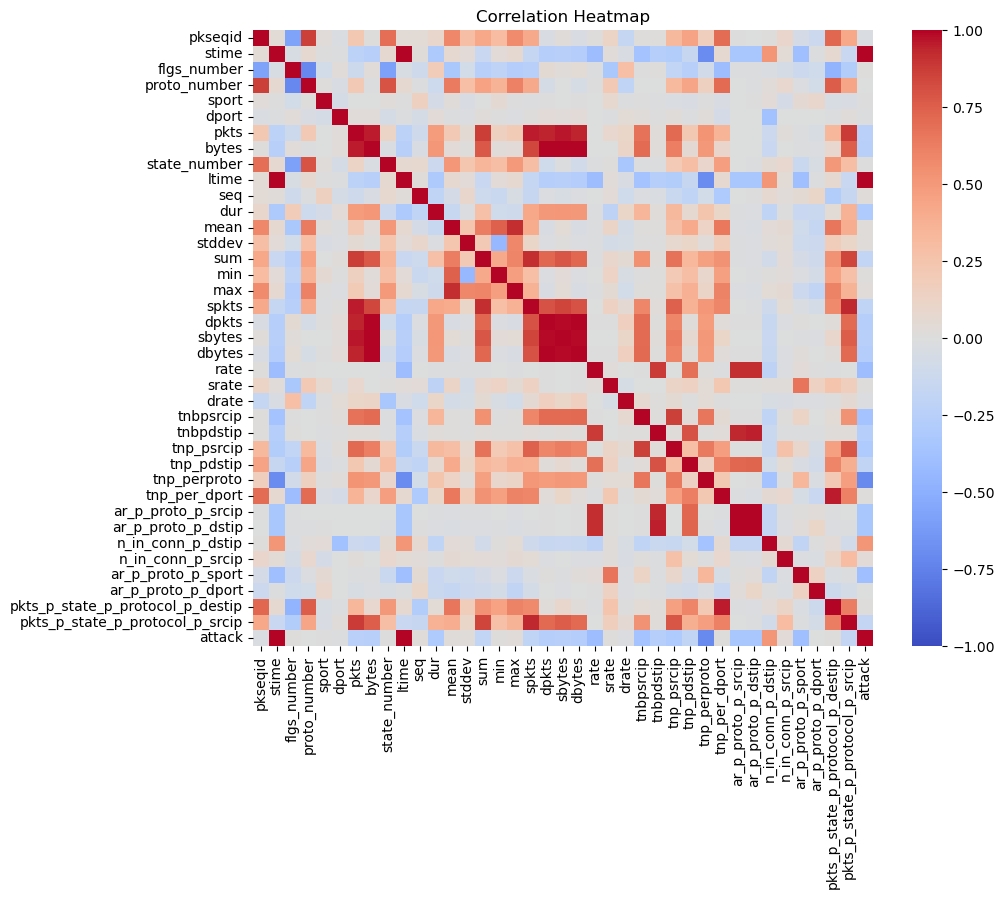

In [31]:
# Select only numeric columns for correlation analysis
numeric_data = data_reduced.select_dtypes(include=['int64', 'float64'])

# Calculate correlations with the target variable 'attack'
correlation_matrix = numeric_data.corr()

# Focus on the correlations with 'attack'
correlation_with_attack = correlation_matrix['attack'].sort_values(ascending=False)
print("Correlation with 'attack':")
print(correlation_with_attack)

# Plot a heatmap for the top correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

Feature Importances:
stime                               0.154350
ltime                               0.120890
pkseqid                             0.109749
tnp_pdstip                          0.106945
tnp_perproto                        0.097166
tnbpdstip                           0.091069
n_in_conn_p_dstip                   0.076835
sbytes                              0.048142
dbytes                              0.029294
ar_p_proto_p_sport                  0.028768
rate                                0.026082
dport                               0.019083
bytes                               0.017917
tnp_psrcip                          0.011128
tnbpsrcip                           0.011024
pkts_p_state_p_protocol_p_destip    0.010932
state_number                        0.007251
tnp_per_dport                       0.007061
sum                                 0.005334
pkts_p_state_p_protocol_p_srcip     0.004397
drate                               0.003818
dpkts                             

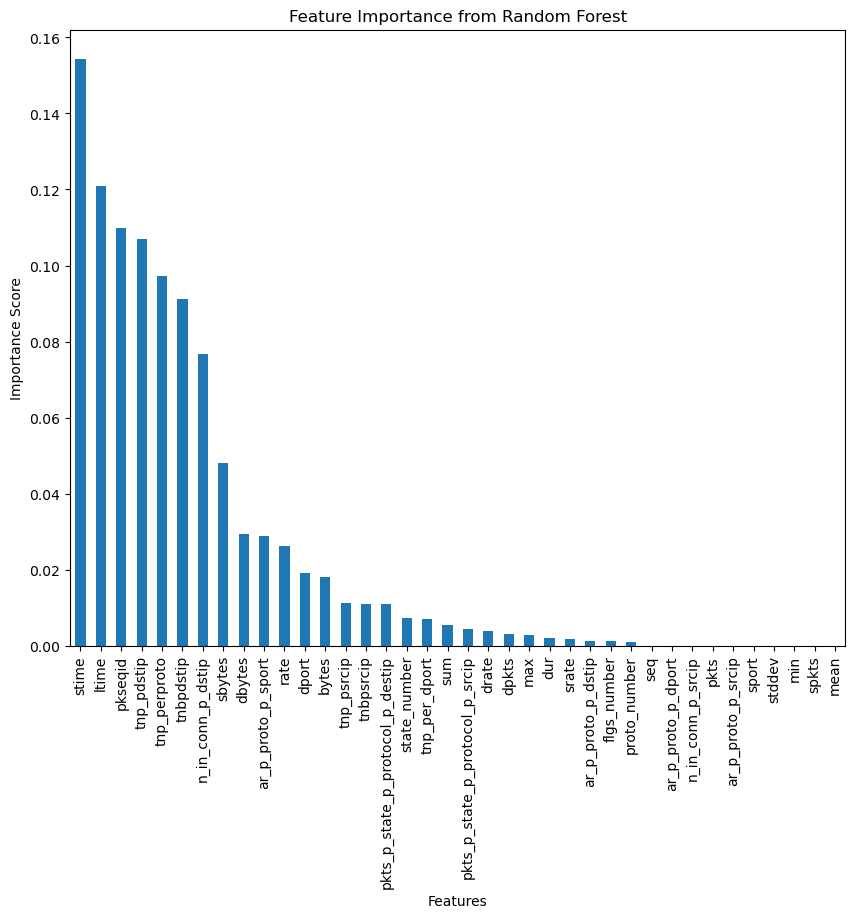

In [32]:
# Define the target variable and features
X = numeric_data.drop('attack', axis=1)  # Drop the target
y = numeric_data['attack']              # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Display the most important features
print("Feature Importances:")
print(feature_importances)

# Plot feature importance
plt.figure(figsize=(10, 8))
feature_importances.plot(kind='bar')
plt.title("Feature Importance from Random Forest")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.show()

Top Features by Correlation:

stime (start time), ltime (end time), and pkseqid are the top three features, indicating they may play a significant role in detecting attacks.
Features like tnp_pdstip, tnp_perproto, and tnbpdstip (likely traffic-related metrics) also have strong correlations.
Less Relevant Features:

Features like sport, stddev, mean, and spkts show no correlation with attack. These can likely be dropped to simplify the model.
Zero-Correlation Features:

Columns with zero correlation (seq, n_in_conn_p_srcip, etc.) are unlikely to add value and can also be excluded.

In [33]:
# Select features with correlation above a threshold
threshold = 0.01
selected_features = correlation_with_attack[correlation_with_attack > threshold].index

# Reduce the dataset to these features
data_selected = numeric_data[selected_features]

print("Selected features for further analysis:")
print(selected_features)

Selected features for further analysis:
Index(['attack', 'ltime', 'stime', 'n_in_conn_p_dstip', 'n_in_conn_p_srcip',
       'max', 'mean', 'seq', 'stddev', 'tnp_per_dport', 'min',
       'pkts_p_state_p_protocol_p_destip', 'flgs_number'],
      dtype='object')


In [34]:
# Make a copy of the selected features to avoid the warning
data_selected = data_selected.copy()

# Feature Engineering: Calculate duration
data_selected['duration'] = data_selected['ltime'] - data_selected['stime']

# Feature Engineering: Calculate source-to-destination ratio
data_selected['src_to_dst_ratio'] = data_selected['n_in_conn_p_srcip'] / (data_selected['n_in_conn_p_dstip'] + 1e-5)

# Drop raw columns if new features replace their utility
data_selected.drop(['ltime', 'stime'], axis=1, inplace=True)

print("Dataset after feature engineering:")
print(data_selected.head())

Dataset after feature engineering:
   attack  n_in_conn_p_dstip  n_in_conn_p_srcip       max      mean     seq  \
0       1                100                 47  4.062956  3.608078  144958   
1       1                100                100  4.860129  3.643915   91994   
2       1                100                 24  3.247971  2.064213  159264   
3       1                100                100  4.105303  3.658348   70362   
4       1                100                 65  4.884540  3.910158  112816   

     stddev  tnp_per_dport       min  pkts_p_state_p_protocol_p_destip  \
0  0.642544            959  2.699384                               959   
1  1.200118            700  2.010604                               700   
2  1.464861            648  0.000000                               518   
3  0.629627           1100  2.767923                              1100   
4  1.367949           1360  1.975604                              1360   

   flgs_number  duration  src_to_dst_ratio  


In [39]:
# Separate features (X) and target variable (y)
X = data_selected.drop('attack', axis=1)  # Drop the target column from features
y = data_selected['attack']              # Target variable

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Scale training data and apply the same transformation to testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
from sklearn.metrics import classification_report, accuracy_score

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate performance
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print("-" * 50)

Model: Logistic Regression
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00     15411

    accuracy                           1.00     15417
   macro avg       1.00      1.00      1.00     15417
weighted avg       1.00      1.00      1.00     15417

--------------------------------------------------
Model: Random Forest
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00     15411

    accuracy                           1.00     15417
   macro avg       1.00      1.00      1.00     15417
weighted avg       1.00      1.00      1.00     15417

--------------------------------------------------
Model: SVM
Accuracy: 0.9997
Classification Report:
              precision    recall  f1-score   support

          

Logistic Regression and Random Forest:

Both models achieved perfect accuracy (100%).
Precision, recall, and F1-scores are all 1.00 for both classes.
This indicates that the models are very confident in their predictions, but we need to verify if the dataset is balanced and the evaluation metrics are meaningful.
Support Vector Machine (SVM):

Accuracy is nearly perfect (99.97%), but:
Recall for class 0 (non-attack) is low, which means it missed some non-attack cases.
This is likely due to the extreme class imbalance (only 6 non-attacks vs. 15,411 attacks in the test set).

Top Features by Importance:
                             Feature  Importance
0                  n_in_conn_p_dstip    0.284462
11                  src_to_dst_ratio    0.165468
8   pkts_p_state_p_protocol_p_destip    0.139163
10                          duration    0.085897
6                      tnp_per_dport    0.081356
2                                max    0.075713
5                             stddev    0.054536
9                        flgs_number    0.040067
4                                seq    0.032809
7                                min    0.017990


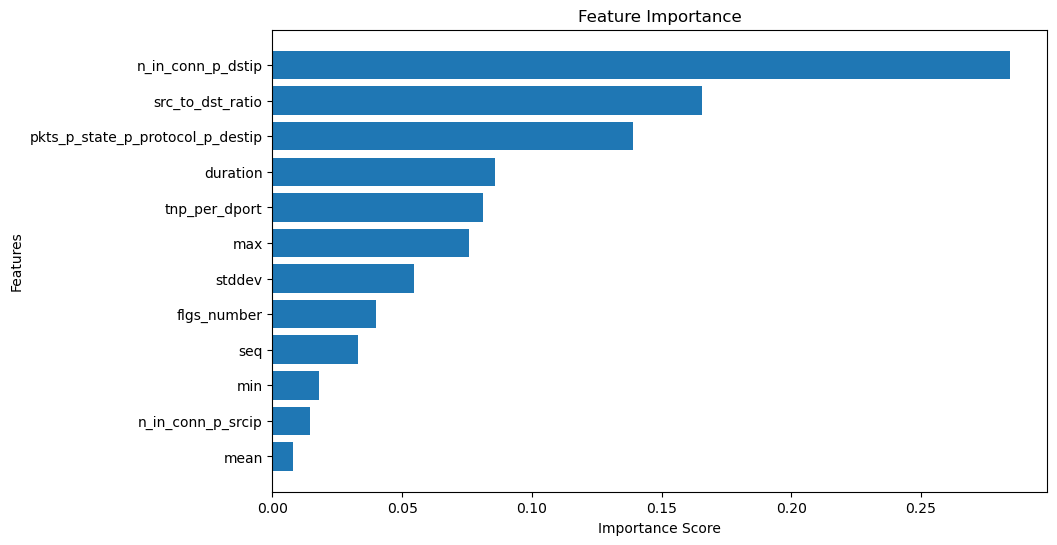

In [42]:
# Extract feature importances from the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)  # Train the model on the scaled data

# Get feature importance scores
importances = rf_model.feature_importances_
feature_names = X.columns  # Feature names

# Create a DataFrame to display importance scores
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the top features
print("Top Features by Importance:")
print(feature_importance_df.head(10))

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # Flip for better readability
plt.show()

Deeper Correlation Analysis
We’ll focus on the top features identified in the feature importance analysis and investigate their relationships with each other and the attack target variable.

Correlation of top features with 'attack':
attack                              1.000000
n_in_conn_p_dstip                   0.518719
max                                 0.025337
stddev                              0.015883
tnp_per_dport                       0.011759
pkts_p_state_p_protocol_p_destip    0.010489
flgs_number                         0.010211
src_to_dst_ratio                   -0.298017
duration                           -0.299757
Name: attack, dtype: float64


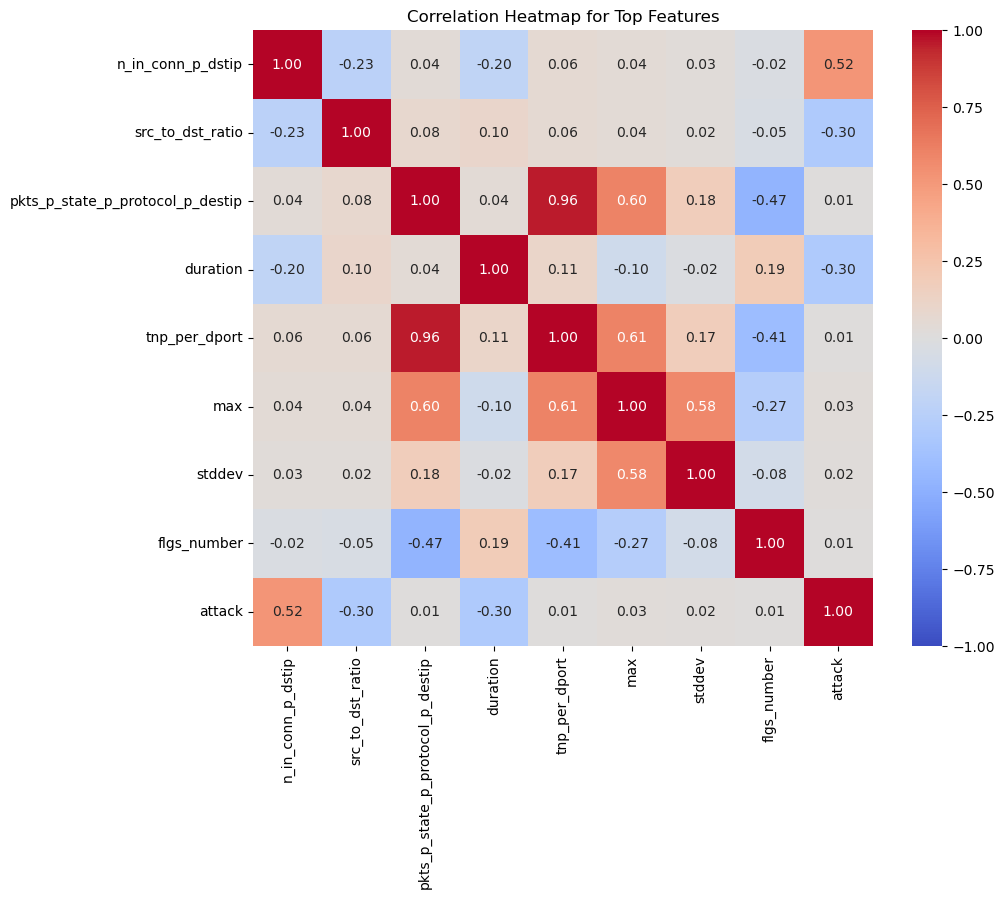

In [43]:
# Select top features for deeper correlation analysis
top_features = [
    'n_in_conn_p_dstip', 'src_to_dst_ratio', 'pkts_p_state_p_protocol_p_destip',
    'duration', 'tnp_per_dport', 'max', 'stddev', 'flgs_number'
]

# Add the target variable for correlation
correlation_data = data_selected[top_features + ['attack']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Display correlations with 'attack'
print("Correlation of top features with 'attack':")
print(correlation_matrix['attack'].sort_values(ascending=False))

# Visualize the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap for Top Features")
plt.show()

Key Observations:
Strong Correlations with attack:

n_in_conn_p_dstip (0.52): The number of inbound connections per destination IP is highly correlated with DDoS attacks.
duration (-0.30): A negative correlation suggests shorter durations are associated with attacks.
src_to_dst_ratio (-0.30): Indicates that imbalanced traffic ratios (e.g., many source connections targeting fewer destinations) are predictive of DDoS attacks.
Feature Relationships:

pkts_p_state_p_protocol_p_destip and tnp_per_dport:
These two features are almost perfectly correlated (0.96). This suggests redundancy—one of them might be sufficient in the model.
Traffic Metrics (max, stddev, tnp_per_dport):
Moderate correlations among these features suggest they capture overlapping traffic behavior patterns.
Low Correlation Features:

Features like flgs_number and stddev show weak correlations with both attack and other features, indicating they may have limited predictive value.